# SCORE Sports Data Repository Questions
## Boston Marathon

### Motivation

The Boston Marathon is an annual road race that takes place in the City of Boston Massachusetts. Attracting thousands of runners of varying skill and experience, year after year participants from around the world gather to compete for world records, divisional records, and personal bests. Examining the results of these athletes yields an interesting look into the spread and distribution of the times of all runners who successfully completed the historic race.

### Questions

1. What summary statistics are relevant to examine for finishing time?

2. Which race times would be considered outliers?

3. Are there extreme outliers?

4. Which runner, the top male or top female, was more remarkable in comparison to their respective fields?

### Loading Data and Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('boston_marathon_2023.csv')

In [3]:
df.head()

,age_group,place_overall,place_gender,place_division,name,team,bib_number,half_time,finish_net,finish_gun,gender,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [4]:
df.shape

(26598, 15)

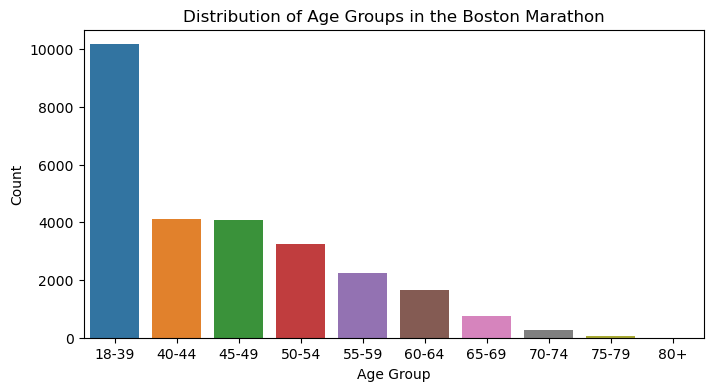

In [5]:
plt.figure(figsize = (8,4))
sns.barplot(x = df['age_group'].value_counts().index, y = df['age_group'].value_counts().values)
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.title('Distribution of Age Groups in the Boston Marathon')
plt.show()

In [6]:
df['team'].nunique()

86

In [7]:
df['team'].value_counts()

Team–                                      25340
TeamTracksmith Boston Hares                   46
TeamMisty Mountain Runners                    43
TeamCharlotte Running Club                    42
TeamBoston Athletic Association               41
                                           ...  
TeamSanta Clarita Runners                      3
TeamTwin Cities Track Club                     3
TeamRaritan Valley Road Runners                3
TeamYellowstone Valley Distance Project        3
TeamAnn Arbor Track Club                       3
Name: team, Length: 86, dtype: int64

In [8]:
df['on_team'] = np.where(df['team'] != 'Team–', 1, 0)

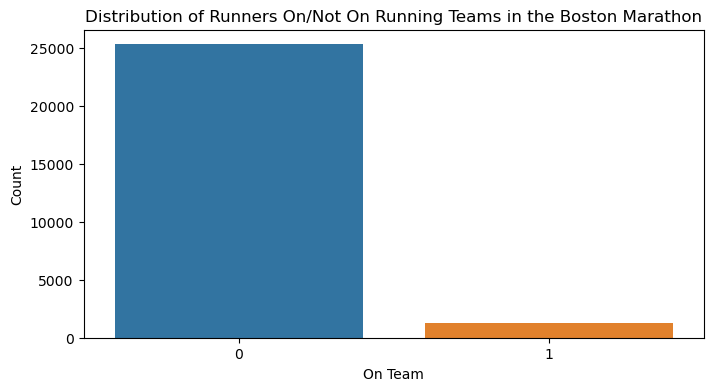

In [9]:
plt.figure(figsize = (8,4))
sns.barplot(x = df['on_team'].value_counts().index, y = df['on_team'].value_counts().values)
plt.ylabel('Count')
plt.xlabel('On Team')
plt.title('Distribution of Runners On/Not On Running Teams in the Boston Marathon')
plt.show()

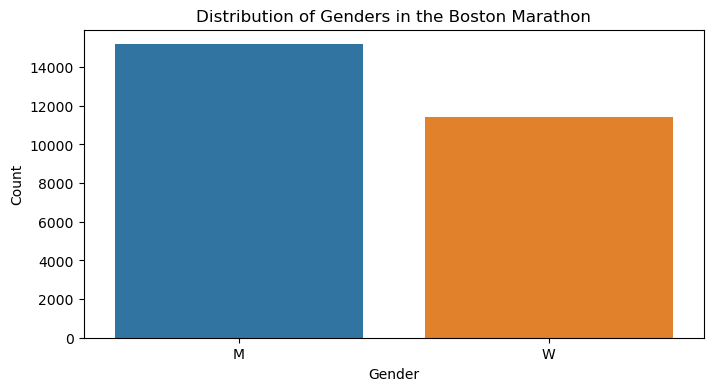

In [10]:
plt.figure(figsize = (8,4))
sns.barplot(x = df['gender'].value_counts().index, y = df['gender'].value_counts().values)
plt.ylabel('Count')
plt.xlabel('Gender')
plt.title('Distribution of Genders in the Boston Marathon')
plt.show()

### 1. What summary statistics are relevant to examine for finishing time?

There are 5 columns that seem to be related to the finishing time of the runner:
- `finish_net`, finishing time timed from when they cross the starting gate, expressed as a string (2H 5M 54S)
- `finish_gun`, finishing time of runner timed from when the starter gun is fired, expressed as a string
- `finish_net_sec`, finishing time timed from when they cross the starting gate, expressed as an integer in seconds (7554)
- `finish_gun_sec`, finishing time of runner timed from when the starter gun is fired, expressed as an integer in seconds
- `finish_net_minutes`, finishing time timed from when they cross the starting gate, expressed as a float in minutes (125.9)

The `_net` and the `_gun` columns seem to be redundant information, but I would like to confirm that before moving on.

In [11]:
df.loc[round(df['finish_net_sec']/60, 4) != round(df['finish_net_minutes'], 4)]

,age_group,place_overall,place_gender,place_division,name,team,bib_number,half_time,finish_net,finish_gun,gender,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes,on_team


In [12]:
def time_string_to_seconds(time_str):
    # Split the string by spaces and extract hours, minutes, and seconds
    time_parts = time_str.split()
    hours = 0
    minutes = 0
    seconds = 0
    for part in time_parts:
        if 'H' in part:
            hours = int(part[:-1])
        elif 'M' in part:
            minutes = int(part[:-1])
        elif 'S' in part:
            seconds = int(part[:-1])

    # Calculate the total time in seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    
    return total_seconds

In [13]:
# Testing function
time_string_to_seconds(df['finish_net'][0])

7554

In [14]:
# Testing matching
df['finish_net_sec'][0]

7554

In [15]:
time_string_to_seconds(df['finish_net'][0]) != df['finish_net_sec'][0]

False

In [16]:
empty_list = []

for n in list(range(0, df.shape[0])):
    if time_string_to_seconds(df['finish_net'][n]) != df['finish_net_sec'][n]:
        empty_list.append(n)
        
if len(empty_list) == 0:
    print('All Rows for finish_net match the total finish_net_sec times')
else:
    print(n)

All Rows for finish_net match the total finish_net_sec times


In [17]:
for n in list(range(0, df.shape[0])):
    if time_string_to_seconds(df['finish_gun'][n]) != df['finish_gun_sec'][n]:
        empty_list.append(n)
        
if len(empty_list) == 0:
    print('All Rows for finish_gun match the total finish_gun_sec times')
else:
    print(n)

All Rows for finish_gun match the total finish_gun_sec times


With this, we have confirmed that the `finish_net`, `finish_net_sec` and `finish_net_minutes` all have the same data

In addition, we have confirmed the the `finish_gun` and the `finish_gun_sec` have the same data as well.

Comparing the times in raw seconds seems to be the best course as it will be the easiest to manage going forward.  I would like to compare the differences between `finish_net_sec` and `finish_gun_sec`

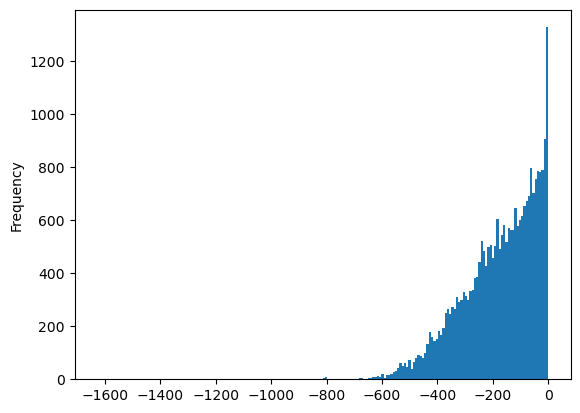

In [18]:
(df['finish_net_sec'] - df['finish_gun_sec']).plot(kind = 'hist', bins = 200)
plt.show()

As an overview there does seem to be a significant difference between the finish times for participants based on when the gun went off and their net time from when they crossed the starting gate.  For some runners, they crossed the starting gate as much as 600 seconds, or 10 minutes, AFTER the starting gun went off.

So now what matters is which time is used for the runner's placing.  If it's based on `finish_net_sec`, then the analysis will be straight forward from there, if it's based on `finish_gun_sec`, then the amount of time it took for the runner to get to the starting gate could be a determining factor for placing.

So let's see which column determines the runner's placing.

In [19]:
df['gun_rank'] = df['finish_gun_sec'].rank(method = 'min')
df['net_rank'] = df['finish_net_sec'].rank(method = 'min')

In [20]:
df[df['finish_net_sec'] == df['finish_net_sec'].value_counts().index[0]].sort_values('place_overall')

,age_group,place_overall,place_gender,place_division,name,team,bib_number,half_time,finish_net,finish_gun,gender,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes,on_team,gun_rank,net_rank
3521,18-39,7445,6375,3522,"Chester, Cameron",Team–,1394,1H 28M 15S,3H 14M 1S,3H 14M 33S,M,5295.0,11641,11673,194.016667,0,6990.0,7439.0
10266,50-54,7446,6376,490,"Wingo, Jason",Team–,15402,1H 36M 42S,3H 14M 1S,3H 19M 47S,M,5802.0,11641,11987,194.016667,0,8422.0,7439.0
6580,40-44,7447,6377,1297,"Willenberg, Lukasz",Team–,4749,1H 23M 58S,3H 14M 1S,3H 16M 12S,M,5038.0,11641,11772,194.016667,0,7422.0,7439.0
24964,55-59,7448,1065,4,"Jiang, Sunny",Team–,8383,1H 34M 43S,3H 14M 1S,3H 15M 36S,W,5683.0,11641,11736,194.016667,0,7264.0,7439.0
6581,40-44,7449,6378,1298,"Porto, Diego",Team–,5901,1H 32M 26S,3H 14M 1S,3H 16M 24S,M,5546.0,11641,11784,194.016667,0,7480.0,7439.0
3522,18-39,7450,6379,3523,"Constant, Timothy",Team–,2738,1H 29M 30S,3H 14M 1S,3H 14M 54S,M,5370.0,11641,11694,194.016667,0,7078.0,7439.0
11974,55-59,7451,6380,146,"Chavez, Rigo",Team–,12911,1H 32M 43S,3H 14M 1S,3H 16M 31S,M,5563.0,11641,11791,194.016667,0,7510.0,7439.0
6582,40-44,7452,6381,1299,"Wise, Steven",Team–,10059,1H 35M 44S,3H 14M 1S,3H 15M 11S,M,5744.0,11641,11711,194.016667,0,7156.0,7439.0
3523,18-39,7453,6382,3524,"O'Connell, Gabriel",Team–,4331,1H 32M 37S,3H 14M 1S,3H 15M 40S,M,5557.0,11641,11740,194.016667,0,7281.0,7439.0
8394,45-49,7454,6383,870,"Sandberg, Jonathan",Team–,13037,1H 37M 51S,3H 14M 1S,3H 22M 44S,M,5871.0,11641,12164,194.016667,0,9204.0,7439.0


In [21]:
df[df['finish_gun_sec'] == df['finish_gun_sec'].value_counts().index[0]].sort_values('place_overall')

,age_group,place_overall,place_gender,place_division,name,team,bib_number,half_time,finish_net,finish_gun,gender,half_time_sec,finish_net_sec,finish_gun_sec,finish_net_minutes,on_team,gun_rank,net_rank
2263,18-39,3250,3074,2264,"Wilkes, Ross",Team–,5668,1H 28M 21S,2H 57M 13S,2H 59M 46S,M,5301.0,10633,10786,177.216667,0,3465.0,3246.0
2264,18-39,3251,3075,2265,"Turnbull, Alex",Team–,5739,1H 27M 5S,2H 57M 13S,2H 59M 46S,M,5225.0,10633,10786,177.216667,0,3465.0,3246.0
15318,18-39,3253,174,144,"Hunter, Kate",Team–,5295,1H 27M 34S,2H 57M 13S,2H 59M 46S,W,5254.0,10633,10786,177.216667,0,3465.0,3246.0
2266,18-39,3255,3078,2267,"Prokop, Ingmar",Team–,5212,1H 27M 41S,2H 57M 15S,2H 59M 46S,M,5261.0,10635,10786,177.250000,0,3465.0,3252.0
7765,45-49,3449,3250,241,"Prendergast, Brian",TeamShore A.C.,4084,1H 28M 45S,2H 57M 53S,2H 59M 46S,M,5325.0,10673,10786,177.883333,1,3465.0,3446.0
7772,45-49,3515,3310,248,"Yokoyama, Toshio",Team–,11582,1H 26M 12S,2H 58M 5S,2H 59M 46S,M,5172.0,10685,10786,178.083333,0,3465.0,3510.0
2400,18-39,3533,3327,2401,"Garcia-Rada Puccio, Rodrigo",Team–,3603,1H 29M 22S,2H 58M 8S,2H 59M 46S,M,5362.0,10688,10786,178.133333,0,3465.0,3526.0
15343,18-39,3534,204,169,"Ward, Marissa",Team–,4115,1H 27M 33S,2H 58M 8S,2H 59M 46S,W,5253.0,10688,10786,178.133333,0,3465.0,3526.0
5831,40-44,3600,3386,548,"Williamson, Taylor",Team–,2588,1H 27M 36S,2H 58M 21S,2H 59M 46S,M,5256.0,10701,10786,178.350000,0,3465.0,3596.0
5849,40-44,3662,3443,566,"von Escher, Markus",Team–,3005,1H 25M 20S,2H 58M 30S,2H 59M 46S,M,5120.0,10710,10786,178.500000,0,3465.0,3651.0


Even though there are several ties throughout the dataset based on the finish times of the runners, there appears to be individual ranks for each runner.  It would seem that the placing of the runner is actually determined by a unit of time smaller than a second.  In races such as this, perhaps it was to the 0.01 of a second, or perhaps even a photo finish.  Either way, comparing the ranking of the finish times to `place_overall` is not effective as the data does not include how `place_overall` was precisely determined.

Instead, I took some common finish times for both `finish_net_sec` and `finish_gun_sec` and compared the rankings of those that finished with the exact same time.  Comparing these, it is clear that `finish_net_sec` was the determining time for a runner's `place_overall`.  Therefore `'finish_net_sec` is the best statistic to examine for finishing times.

### `finish_net_sec` EDA

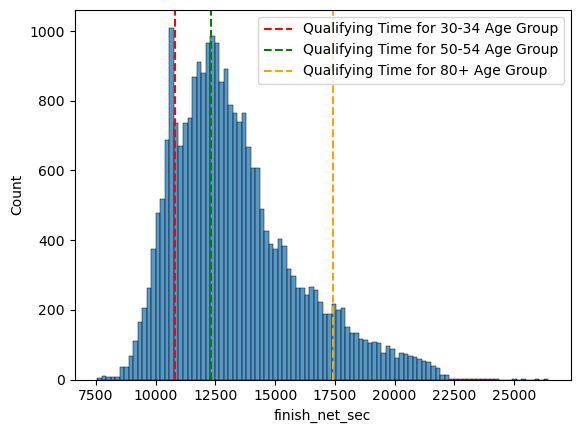

In [22]:
sns.histplot(x = df['finish_net_sec'], bins = 100)
plt.axvline(10800, c = 'red', label = 'Qualifying Time for 30-34 Age Group', ls = '--')
plt.axvline(12300, c = 'green', label = 'Qualifying Time for 50-54 Age Group', ls = '--')
plt.axvline(17400, c = 'orange', label = 'Qualifying Time for 80+ Age Group', ls = '--')
plt.legend(loc=0)
plt.show()

The distribution of of finish times are somewhat normally distributed, but seem to be more reflected by the qualifying times required for each age group.  The highest peak coincides with the 30-34 Qualifying Time of 3 hours (or 10800 seconds).  The second peak coincides with the qualifying time for the 50-54 age group, but would likely include finishers of the 40-44 and 45-49 age groups that ran just a bit slower than their qualifying times.

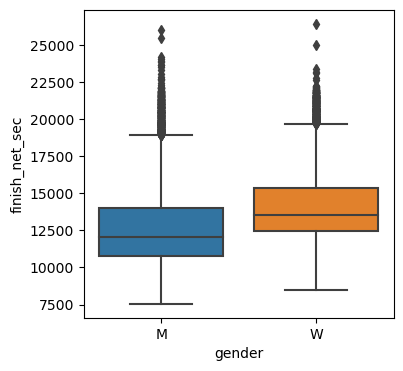

In [23]:
plt.figure(figsize = (4, 4))
sns.boxplot(x = df['gender'], y = df['finish_net_sec'])
plt.show()

Between men and women, it is unsurprising that, on average, men's times were faster than women's.  It does appear that women's performances are more condensed in its distribution, although there a could of single performances that are extreme outliers.

In diving into other categories, seeing how they relate, along with a men/women split, may provide additional insight about the outliers within each group.

In [24]:
men_df = df[df['gender'] == 'M']
women_df = df[df['gender'] == 'W']

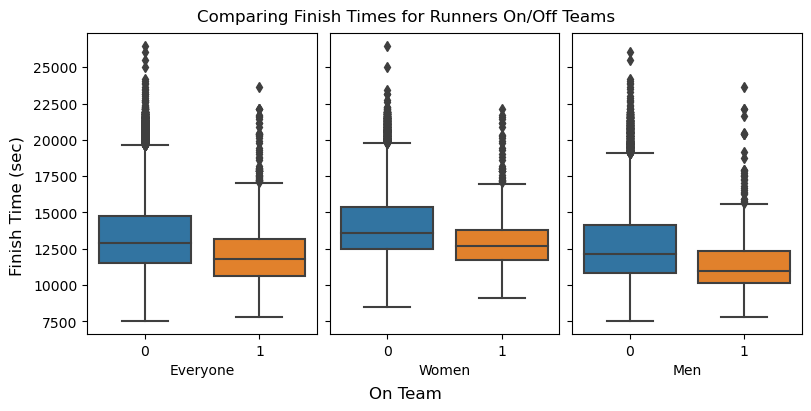

In [25]:
fig, ax = plt.subplots(1, 3, sharey = True, figsize = (8,4), layout = 'constrained')

sns.boxplot(x = df['on_team'], y = df['finish_net_sec'], ax = ax[0])
ax[0].set(ylabel = None, xlabel = 'Everyone')
sns.boxplot(x = women_df['on_team'], y = women_df['finish_net_sec'], ax = ax[1])
ax[1].set(ylabel = None, xlabel = 'Women')
sns.boxplot(x = men_df['on_team'], y = men_df['finish_net_sec'], ax = ax[2])
ax[2].set(ylabel = None, xlabel = 'Men')

fig.suptitle('Comparing Finish Times for Runners On/Off Teams')
fig.supylabel('Finish Time (sec)')
fig.supxlabel('On Team')

plt.show()

It appears that the biggest outliers were runners that were not on a team.  Considering the vast majority of runners were not on a team, that doesn't come as a big surprise but is still noteworthy.

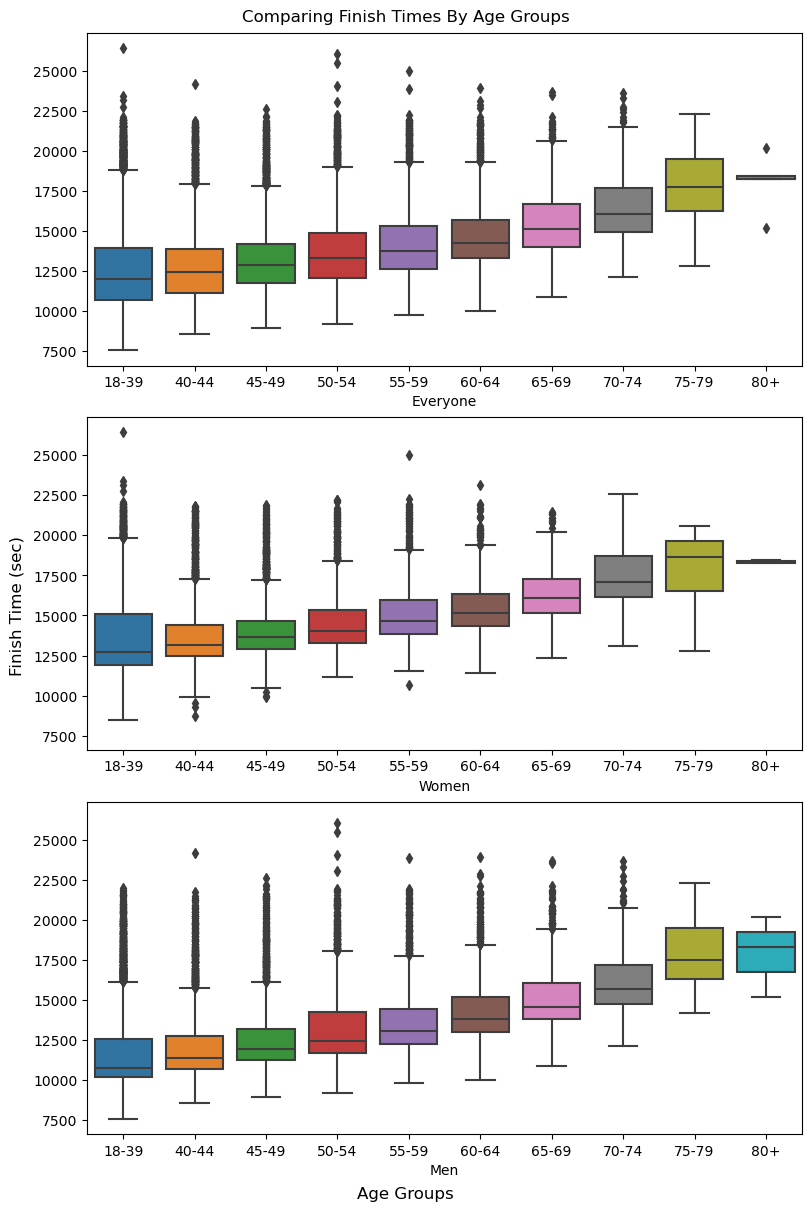

In [26]:
fig, ax = plt.subplots(3, 1, sharey = True, figsize = (8,12), layout = 'constrained')

sns.boxplot(x = df['age_group'], y = df['finish_net_sec'], ax = ax[0])
ax[0].set(ylabel = None, xlabel = 'Everyone')
sns.boxplot(x = women_df['age_group'], y = women_df['finish_net_sec'], ax = ax[1])
ax[1].set(ylabel = None, xlabel = 'Women')
sns.boxplot(x = men_df['age_group'], y = men_df['finish_net_sec'], ax = ax[2])
ax[2].set(ylabel = None, xlabel = 'Men')

fig.suptitle('Comparing Finish Times By Age Groups')
fig.supylabel('Finish Time (sec)')
fig.supxlabel('Age Groups')

plt.show()

The 18-39 age group is the fastest age group on average, but the slowest time overall appears to be a women in that age group.  That would seem to make it the biggest outlier between all age groups.

### 2. Which race times would be considered outliers?

For comparing times, and getting a sense of the data for the future questions about identifying outliers, I first want to see a comparison of finish times between Men and Women.  From there, I'd like to see not just the comparison of finish times between runners on/off teams and age groups, but also dividing those within groups of Men and Women.  This will give us the best sense of where the biggest outliers will be.

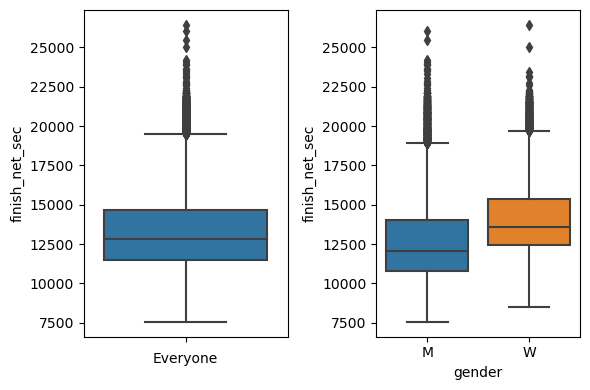

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (6, 4), layout = 'tight')

sns.boxplot(y = df['finish_net_sec'], ax = ax[0])
ax[0].set_xlabel('Everyone')
sns.boxplot(x = df['gender'], y = df['finish_net_sec'], ax = ax[1])

plt.show()

On visualization, it would appear that very high `finish_net_sec` results, that is to say very SLOW results, are the outliers.  While we generally consider extremely fast runners as outliers as performers, when compared to the results of a elite race such as the Boston Marathon, it is the extremely slow times that seem to be actual mathematical outliers.

I'll confirm this to see what proportion of all of the finishers were Fast Outliers and Slow Outliers.

In [28]:
q1 = np.percentile(df['finish_net_sec'], 25)
q3 = np.percentile(df['finish_net_sec'], 75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [29]:
print(f'To be a FAST outlier, the runner has to be faster than {round(lower_bound, 0)} seconds')
print(f'To be a SLOW outlier, the runner has to be slower than {round(upper_bound, 0)} seconds')

To be a FAST outlier, the runner has to be faster than 6660.0 seconds
To be a SLOW outlier, the runner has to be slower than 19471.0 seconds


To be considered an FAST outlier, the runner had to run the marathon in 6660 seconds, or a total time of 1 hour, 51 minutes and 0 seconds.  At the time of the race, this would be more than 10 minutes FASTER than the men's World Record for the Marathon which would seem impossible.

In [30]:
fast_outliers = [x for x in df['finish_net_sec'] if x < lower_bound]
slow_outliers = [x for x in df['finish_net_sec'] if x > upper_bound]

In [31]:
print(f'{round(len(fast_outliers)/len(df)*100, 4)}% of results were FAST Outliers')
print(f'{round(len(slow_outliers)/len(df)*100, 4)}% of results were SLOW Outliers')

0.0% of results were FAST Outliers
3.3048% of results were SLOW Outliers


In [32]:
len(slow_outliers)

879

This confirms that all of the outliers were those who ran the marathon too SLOW, with 3.3% of all racers finishing slower than the upper bound of 'normal' results.

### 3. Are there extreme outliers?

While it has been confirmed that nearly 1% of the times were outliers using an Interquartile Range (IQR) method.  To find even more extreme outliers, perhaps using +/- 3 standard deviations will show more specific results for extreme outliers.

In [33]:
fast_outlier_time = df['finish_net_sec'].mean() - df['finish_net_sec'].std()*3
slow_outlier_time = df['finish_net_sec'].mean() + df['finish_net_sec'].std()*3

In [34]:
round(len(df.loc[df['finish_net_sec'] <= fast_outlier_time]), 4)

0

In [35]:
round(len(df.loc[df['finish_net_sec'] >= slow_outlier_time]), 4)

204

In [36]:
round(len(df.loc[df['finish_net_sec'] >= (df['finish_net_sec'].mean() + df['finish_net_sec'].std()*3)])/len(df)*100, 3)

0.767

Similar to using the IQR method, there are no extreme outliers on the faster side of the results.

However, there were significantly fewer outliers via standard deviation overall, with only 0.767% of the slower performances classifying as an outlier.

This again confirms that there were only outliers on the slower side of the results.

### 4. Which runner, the top male or top female, was more remarkable in comparison to their respective fields?

In this instance, 'most remarkable' is relatively vague.  However, given that the assigned questions have been focused on identifying outliers within the data, I will use the same processes to determine whether the Men's or the Women's winner was a greater outlier relative to their respective fields.

In [37]:
fastest_man = df.loc[df['gender'] == 'M', 'finish_net_sec'].min()
fastest_woman = df.loc[df['gender'] == 'W', 'finish_net_sec'].min()

In [38]:
m_q1 = np.percentile(men_df['finish_net_sec'], 25)
m_q3 = np.percentile(men_df['finish_net_sec'], 75)
m_iqr = m_q3 - m_q1
average_man = df.loc[df['gender'] == 'M', 'finish_net_sec'].mean()
m_std = df.loc[df['gender'] == 'M', 'finish_net_sec'].std()
print(f'{round((average_man-fastest_man)/m_iqr, 2)} IQRs')
print(f'{round((average_man-fastest_man)/m_std, 2)} Standard Deviations')

1.6 IQRs
1.98 Standard Deviations


In [39]:
w_q1 = np.percentile(women_df['finish_net_sec'], 25)
w_q3 = np.percentile(women_df['finish_net_sec'], 75)
w_iqr = w_q3 - w_q1
average_woman = df.loc[df['gender'] == 'W', 'finish_net_sec'].mean()
w_std = df.loc[df['gender'] == 'W', 'finish_net_sec'].std()
print(f'{round((average_woman-fastest_woman)/w_iqr, 2)} IQRs')
print(f'{round((average_woman-fastest_woman)/w_std, 2)} Standard Deviations')

1.96 IQRs
2.35 Standard Deviations


In [40]:
df.loc[(df['gender'] == 'M') & (df['place_gender'] == 1)]['name']

0    Chebet, Evans
Name: name, dtype: object

In [41]:
df.loc[(df['gender'] == 'W') & (df['place_gender'] == 1)]['name']

15175    Obiri, Hellen
Name: name, dtype: object

Either way that you look at it, Hellen Obiri's performance within the women's race was more of a performance outlier than Evans Chebet's was in the men's race.  Hellen's performance was a more standout performance whether it was measured by IQR's (1.77 vs 1.62) or Standard Deviations (2.35 vs 1.98).

An interesting note here is that when the entire field, men and women, there were no performances that were statistical outliers on the faster end of the dataset.  However, when compared to the results of their respective genders, both performances (and perhaps others) DID count as statistical outliers when using IQR method.  Both Hellen and Evans races were more than 1.5 IQRs less than the mean for their respective genders.

This shows how important it is to appropriately categorize the dataset when it comes to identifying outliers.  While it was not requested within these questions, it is clear that the number of outliers, or at least the distribution of outliers between faster and slower runners, could change significantly if the data was separated into men's and women's results.

### BONUS. Which runner was the most remarkable respective of their Gender & Age Group?

While it is interesting to see that Women's winner was a more remarkable performance than the Men's winner when compared to their respective competitions, I thought it would be interesting to see which performance across all age groups within each gender group had the most remarkable performance.

In [42]:
my_dict = {}

my_list = []

for gender in df['gender'].unique():
    for ag in df['age_group'].unique():

        ag_df = df[(df['gender'] == gender) & (df['age_group'] == ag)]
        fastest_ag = ag_df['finish_net_sec'].min()
        ag_q1 = np.percentile(ag_df['finish_net_sec'], 25)
        ag_q3 = np.percentile(ag_df['finish_net_sec'], 75)
        ag_iqr = ag_q3 - ag_q1
        average_ag = ag_df['finish_net_sec'].mean()
        my_dict[f'{gender}{ag}'] = round((average_ag-fastest_ag)/ag_iqr, 2)

best_gender = max(my_dict, key = my_dict.get)[0]
best_ag = max(my_dict, key = my_dict.get)[1:]
best_iqr = sorted(my_dict.values(), reverse = True)[0]

best_df = df[(df['gender'] == best_gender) & (df['age_group'] == best_ag)]
best_runner = best_df.loc[best_df['place_division'] == 1, 'name'].values[0]
best_time = best_df.loc[best_df['place_division'] == 1, 'finish_net_sec'].values[0]

print(f"{best_runner.split(',')[1][1:]} {best_runner.split(',')[0]} in the {best_gender}{best_ag} age group was the most remarkable runner when comparing all age group categories.")
print(f"The time of {best_time} was {best_iqr} IQRs faster than the mean within their age group.")

Sara Hall in the W40-44 age group was the most remarkable runner when comparing all age group categories.
The time of 8748 was 2.66 IQRs faster than the mean within their age group.
